# Árvore de decisão - Decision Tree

São modelos baseados em nós e folhas. Utilizam uma série de estruturas condicionais (if..elif..else) para se chegar a um resultado.

- Nós: representam os pontos de decisão, onde há uma ou mais alternativas

- Folhas: representam as decisões propriamente ditas, é o final de um processo de decisão (decisão final).

Na regressão, as folhas das árvores de decisão têm valores contínuos.
Muito dependente da amostra de dados utilizada para treinamento.
Caso a amostra mude de comportamento, então a árvore ficará obsoleta (overfitting) e precisará ser retreinada.

In [21]:
# Importando bibliotecas e métodos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [22]:
# Criando uma tabela com dados fictícios na estrutura de DataFrame

# Definindo uma semente fixa para geração de números aleatórios
np.random.seed(10)

df = pd.DataFrame({
    'x': np.arange(0,20),
    'y': np.arange(0,20) + np.random.randint(0, 4, 20)
})

df

,x,y
0,0,1
1,1,2
2,2,2
3,3,6
4,4,4
5,5,6
6,6,9
7,7,7
8,8,9
9,9,10


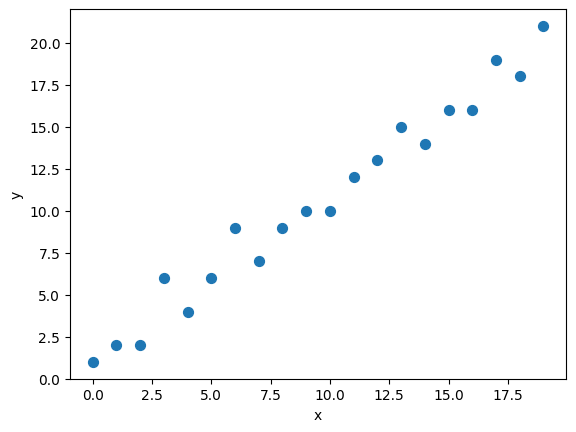

In [23]:
# Verificando os dados acima através de um gráfico de pontos

df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=50
);

In [24]:
# Criando o modelo com o método DecisionTreeRegressor

modelo = DecisionTreeRegressor(
    random_state = 10, # parâmetro para definir um valor aleatório fixo
)

modelo

DecisionTreeRegressor(random_state=10)

In [25]:
# Separando os campos da tabela em atributos e rótulo
atributos = df['x'].to_frame()
rotulo = df['y'].to_frame()

In [26]:
# Treinando o modelo
modelo.fit(atributos, rotulo)

DecisionTreeRegressor(random_state=10)

In [27]:
# Conferindo os valores de predição que o modelo gerou
predicao = modelo.predict(atributos)
predicao

array([ 1.,  2.,  2.,  6.,  4.,  6.,  9.,  7.,  9., 10., 10., 12., 13.,
       15., 14., 16., 16., 19., 18., 21.])

In [28]:
# Adicionando um campo na tabela com os valores gerados pelo modelo (predição)
df['predicao'] = predicao
df

,x,y,predicao
0,0,1,1.0
1,1,2,2.0
2,2,2,2.0
3,3,6,6.0
4,4,4,4.0
5,5,6,6.0
6,6,9,9.0
7,7,7,7.0
8,8,9,9.0
9,9,10,10.0


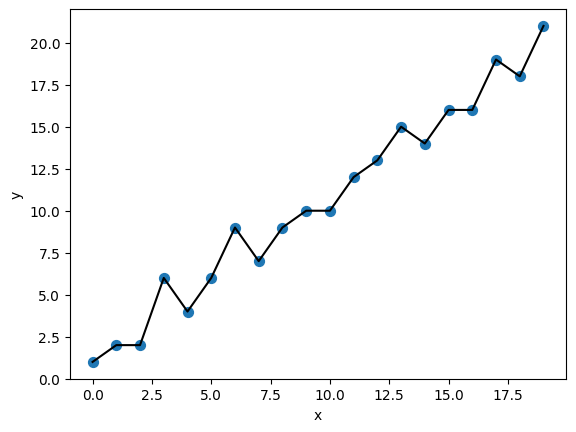

In [29]:
# Comparando os dados dos atributos e rótulos com as predições do modelo

# Gráfico com os atributos e rótulos
df.plot(
    kind='scatter',
    x = 'x',
    y = 'y',
    s = 50
)

# Gráfico de linha com os valores de predição do modelo
plt.plot(
    df['x'],
    df['predicao'],
    color = 'black'
);

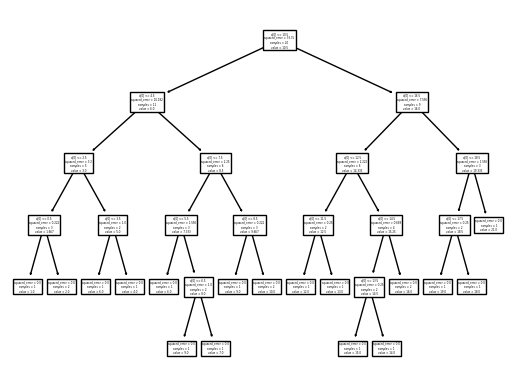

In [30]:
# Plotando o gráfico da árvore de decisão com plot_tree

plot_tree(modelo);

In [31]:
# Treinando um novo modelo e definindo como parâmetro uma profundidade máxima = 3

modelo = DecisionTreeRegressor(max_depth=3)
modelo

DecisionTreeRegressor(max_depth=3)

In [32]:
# Treinando o modelo novamente
modelo.fit(atributos, rotulo)

DecisionTreeRegressor(max_depth=3)

In [33]:
# Adicionando um campo na tabela com os valores gerados pelo modelo (predição)
df['predicao2'] = modelo.predict(atributos)
df

,x,y,predicao,predicao2
0,0,1,1.0,1.666667
1,1,2,2.0,1.666667
2,2,2,2.0,1.666667
3,3,6,6.0,5.000000
4,4,4,4.0,5.000000
5,5,6,6.0,7.333333
6,6,9,9.0,7.333333
7,7,7,7.0,7.333333
8,8,9,9.0,9.666667
9,9,10,10.0,9.666667


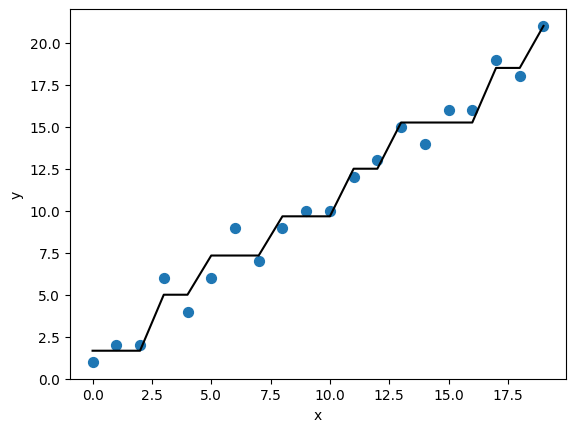

In [34]:
# Criando gráficos para fazer a comparação entre os valores (atributos e rótulos) e valores da predição

# Gráfico de pontos
df.plot(
    kind = 'scatter',
    x = 'x',
    y = 'y',
    s = 50
)

# Gráfico de linhas (valores de predição)
plt.plot(
    df['x'],
    df['predicao2'],
    color = 'black'
);

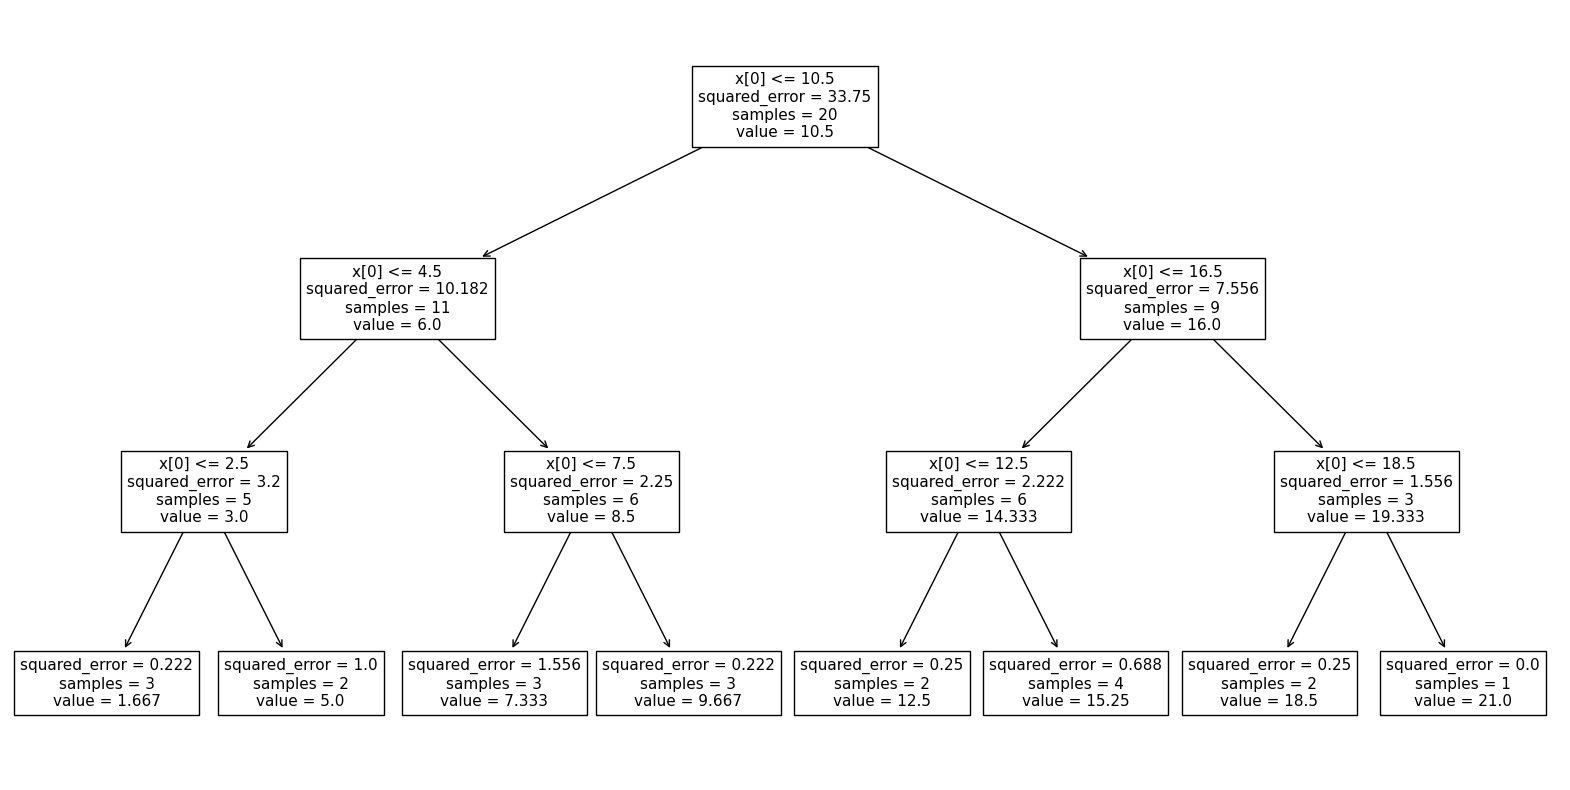

In [35]:
# Visualizando o orgonograma criado pelo modelo através da função plot_tree

plt.figure(figsize=(20,10))
plot_tree(modelo);

In [36]:
# Criando o modelo novamente, passando a quantidade mínima de amostras por folha (min_samples_leaf=2)

modelo = DecisionTreeRegressor(min_samples_leaf=2)
modelo

DecisionTreeRegressor(min_samples_leaf=2)

In [37]:
# Treinando o modelo

modelo.fit(atributos, rotulo)

DecisionTreeRegressor(min_samples_leaf=2)

In [38]:
# Adicionando um campo na tabela com os valores gerados pelo modelo (predição)

df['predicao3'] = modelo.predict(atributos)
df

,x,y,predicao,predicao2,predicao3
0,0,1,1.0,1.666667,1.666667
1,1,2,2.0,1.666667,1.666667
2,2,2,2.0,1.666667,1.666667
3,3,6,6.0,5.000000,5.000000
4,4,4,4.0,5.000000,5.000000
5,5,6,6.0,7.333333,7.333333
6,6,9,9.0,7.333333,7.333333
7,7,7,7.0,7.333333,7.333333
8,8,9,9.0,9.666667,9.666667
9,9,10,10.0,9.666667,9.666667


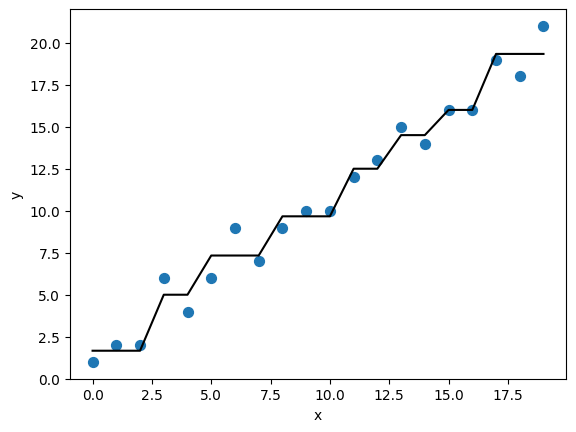

In [39]:
# Criando gráficos para fazer a comparação entre os valores (atributos e rótulos) e valores da predição

# Gráfico de pontos
df.plot(
    kind = 'scatter',
    x = 'x',
    y = 'y',
    s = 50
)

# Gráfico de linhas (valores de predição)
plt.plot(
    df['x'],
    df['predicao3'],
    color = 'black'
);

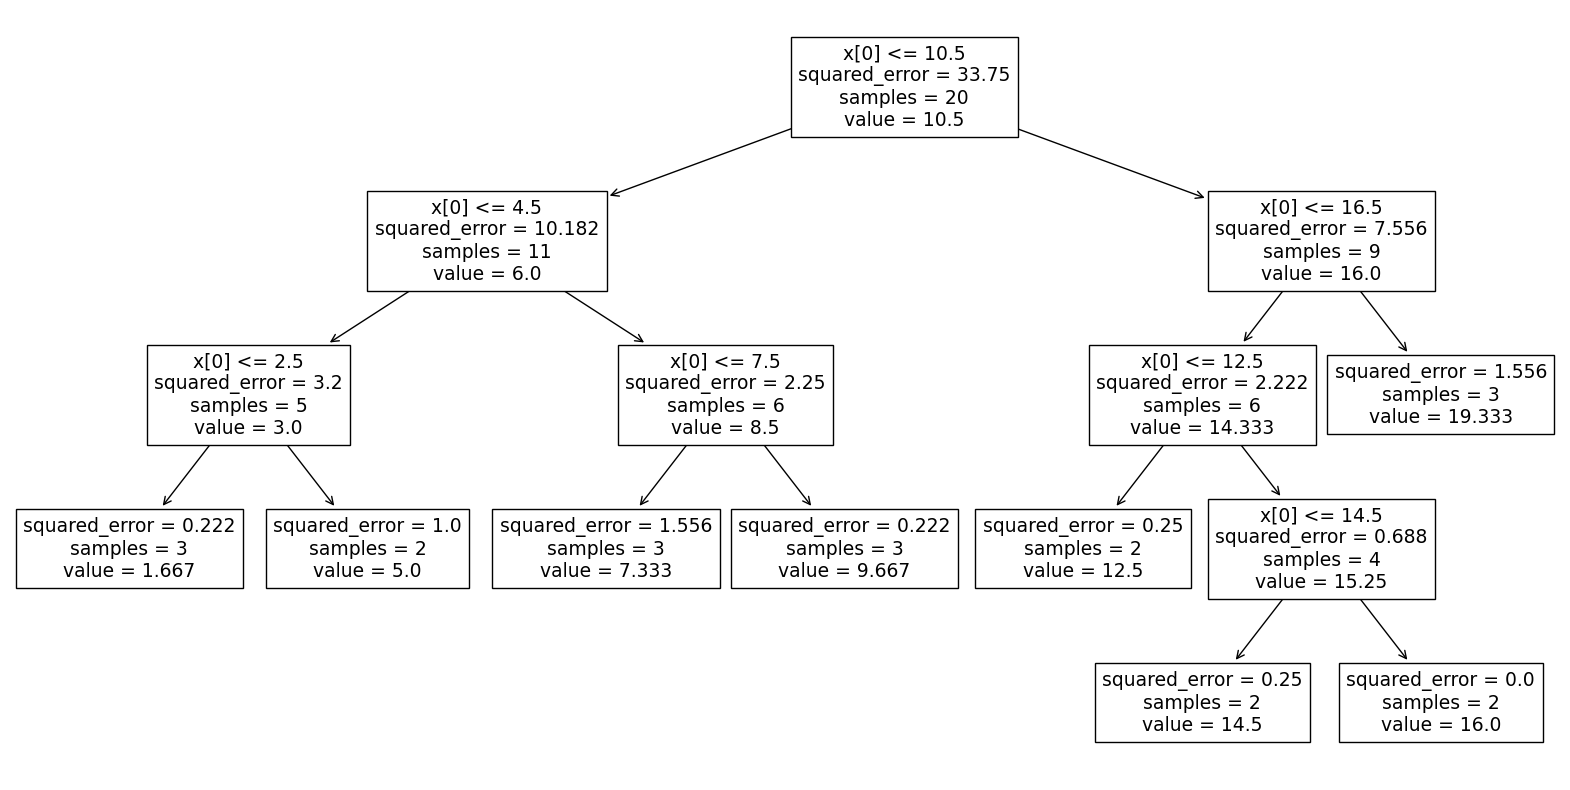

In [40]:
# Visualizando o orgonograma criado pelo modelo através da função plot_tree

plt.figure(figsize=(20,10))
plot_tree(modelo);